In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import glob

from jupyterthemes import jtplot
from ali.ali_sw import *
from ali.ali_peaks import *
from ali.recovery_times import *

In [2]:
jtplot.style('default', grid=False)

In [36]:
@dataclass
class AliPeaks:
    "ALI dataclass, peaks df and metadata"
    dfp : pd.DataFrame 
    p_gas : str 
    t_on : str
    date : str
    other_meta : str = None
        
def import_peaks(path : str) -> list:
    """Preliminar import peaks dfp and metadata
    Should go into AliPeaks class
    Returns: dfp, p_gas, t_on, date"""
    dfp = pd.read_csv(path, index_col = 0)
    filename = os.path.split(path)[1]
    p_gas  = re.search('\d+mbar', filename).group(0)
    t_on = re.search('\d+ms', filename).group(0)
    da = re.search('/\d+_', path).group(0).replace('/', '').replace('_', '')  
    date = re.sub('(\d{2})(\d{2})(\d{4})', r"\1.\2.\3", da, flags=re.DOTALL)
    
    other_meta = filename.replace(p_gas, '').replace(t_on, '').replace(date, '')
    
    return AliPeaks(dfp, p_gas, t_on, date, other_meta)

# Import all depletion data

In [37]:
path = '../ali_data/depletion_cleaning/processed_peaks/*.pyk'
files = glob.glob(path)
files, len(files)

(['../ali_data/depletion_cleaning/processed_peaks/21102019_depletion_AcN_FBI_1uM_200mbar_50ms_300pulse.pyk',
  '../ali_data/depletion_cleaning/processed_peaks/26072019_Depletion_200mbar_50ms_500pulses_rga.pyk',
  '../ali_data/depletion_cleaning/processed_peaks/10102019_depletion_AcN_FBI_500nM_350mbar_50ms_300pulse.pyk',
  '../ali_data/depletion_cleaning/processed_peaks/18072019_ALI_Cleaning_200mbar_70ms_100pulses_rga.pyk',
  '../ali_data/depletion_cleaning/processed_peaks/27092019_depletion_AcN_FBI_500nM_cleaning_570mbar_50ms_300pulse.pyk'],
 5)

In [38]:
experiments = [import_peaks(f) for f in files]

# Plot all average profiles and recovery thresholds 

In [8]:
nfiles = len(files)
nrows = int(np.sqrt(nfiles))
ncols = 3

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0.5, 0.98, 'AcN depletion')

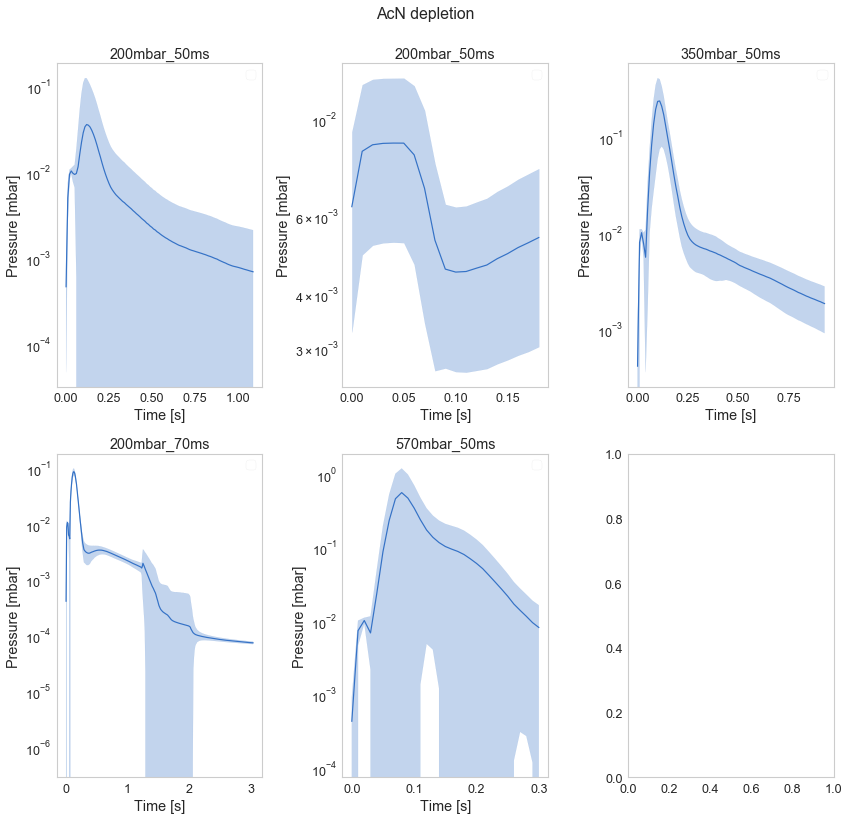

In [13]:
fig, ax = plt.subplots(nrows, ncols, figsize=(12, 4))#, sharex=True, sharey=True)
for i, exp in enumerate(experiments):
    row = i % ncols
    col = i // ncols

    plotAverageProfile(exp.dfp, lb='__nolabel__' , ax=ax[col, row]);
    ax[col,row].set_title(exp.p_gas+'_'+exp.t_on)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
#     ax[col,row].set_xlim(-0.1,2)
fig.suptitle('AcN depletion')

## Select and plot threshold recovery pressure 

Plotted in red dashed line

In [14]:
pActs = (8e-4, 5e-3, 2e-3, 5e-4, 6e-3)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


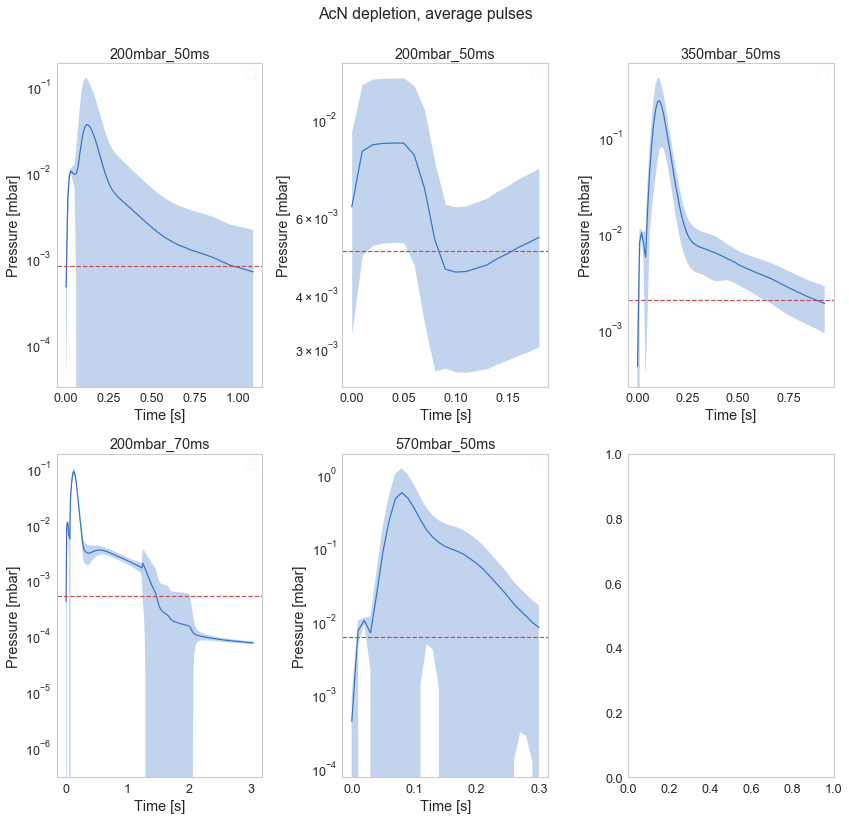

In [15]:
fig, ax = plt.subplots(nrows, ncols, figsize=(12, 4))#, sharex=True, sharey=True)
for i, exp in enumerate(experiments):

    row = i % ncols
    col = i // ncols
    plotAverageProfile(exp.dfp, lb='__nolabel__' , ax=ax[col, row]);
    ax[col,row].axhline(pActs[i], c='r', ls='--', label='$p_{thres}$ for $t_{rec}$ analysis')
    
    ax[col,row].set_title(exp.p_gas+'_'+exp.t_on)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
#     ax[col,row].set_xlim(-0.1,2)
fig.suptitle('AcN depletion, average pulses');


# Plot maxP and recTime 

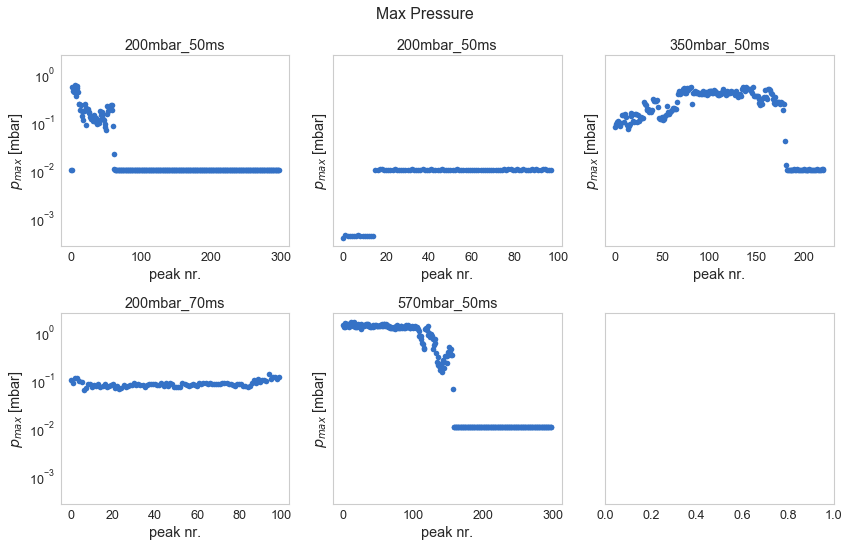

In [16]:
pmax_arr = []
fig, ax = plt.subplots(nrows, ncols, figsize=(12, 8), sharey=True) #,sharey=True)
for i, exp in enumerate(experiments):
    row = i % ncols
    col = i // ncols
    pmax_arr.append(plot_maxP(exp.dfp , ax=ax[col, row]))
    ax[col,row].set_title(exp.p_gas+'_'+exp.t_on)
#     ax[col,row].set_xlim(-0.1,2)
fig.suptitle('Max Pressure')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

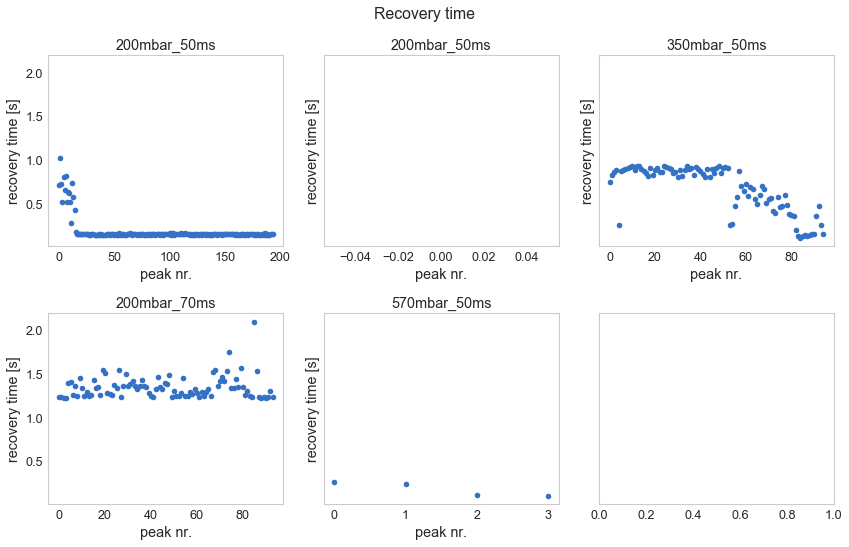

In [17]:
rT_arr = []
fig, ax = plt.subplots(nrows, ncols, figsize=(12, 8), sharey=True)#, sharey=True)
for i, exp in enumerate(experiments):
    row = i % ncols
    col = i // ncols    
    rT_arr.append(plotRecoveryTimes(exp.dfp, pActs[i], ax=ax[col, row]))
    
    ax[col,row].set_title(exp.p_gas+'_'+exp.t_on)
fig.suptitle('Recovery time')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])    

## Classify before and after depletion

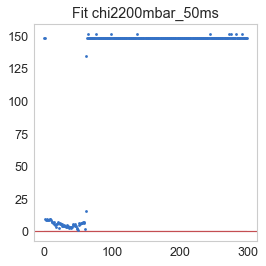

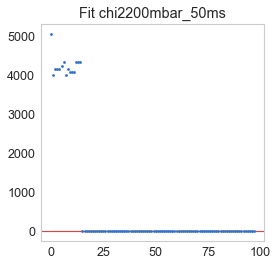

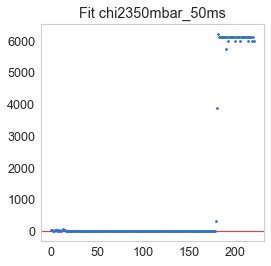

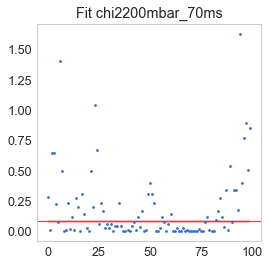

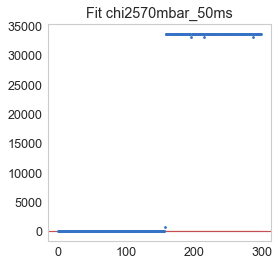

In [20]:
iDeplet = []
# fig, ax = plt.subplots(ncols, nrows, figsize=(10,10), sharey=True)
for i, exp in enumerate(experiments):
    col = i % ncols
    row = i // ncols
    plt.figure(figsize=(4,4))
    iDeplet.append(depletionFromMaxP(exp.dfp))
    plt.title('Fit chi2 ' + exp.p_gas+'_'+exp.t_on)

# fig.suptitle('Max Pressure')
# fig.tight_layout(rect=[0, 0.03, 1, 0.95])

In [21]:
iDeplet[1] = 15

In [22]:
iDeplet

[65, 15, 182, 94, 158]

# Plot average profiles before and after depletion

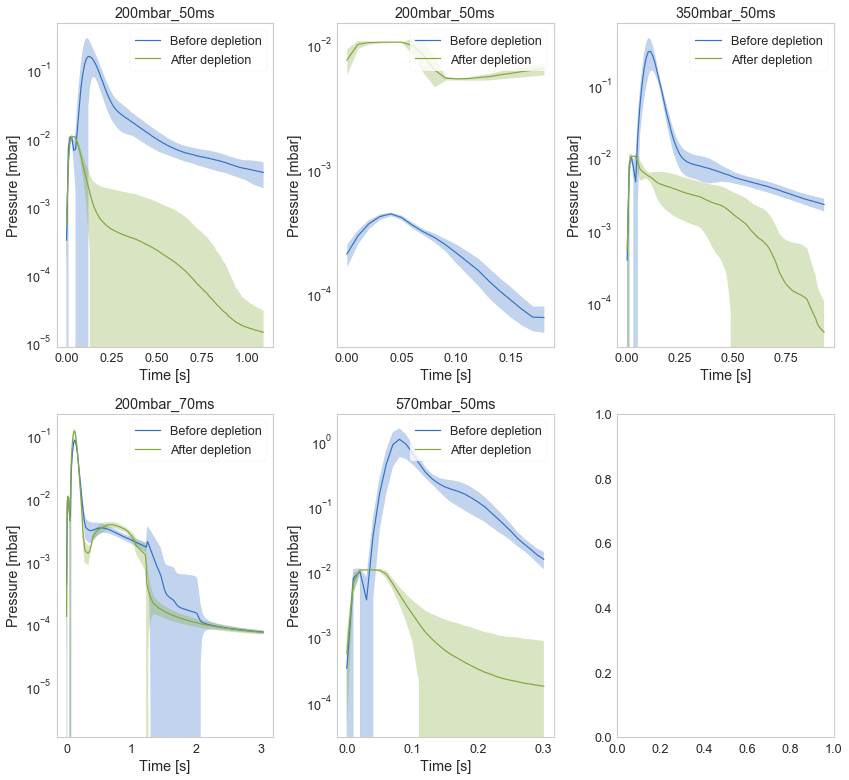

In [23]:
fig, ax = plt.subplots(nrows, ncols, figsize=(12, 4))#, sharex=True, sharey=True)
for i, exp in enumerate(experiments):
    
    row = i % ncols
    col = i // ncols
    plotAverageProfile(exp.dfp.iloc[:,:iDeplet[i]], color='b', ax=ax[col, row], lb='Before depletion')
    plotAverageProfile(exp.dfp.iloc[:,iDeplet[i]:], color='g', ax=ax[col, row], lb='After depletion')
    
    ax[col,row].set_title(exp.p_gas+'_'+exp.t_on)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

## Compute injected volume per pulse

In [24]:
VpP = [0.3/i for i in iDeplet]

# Gather results 

##### Filter p_max and recovery time for before depletion only and average

In [25]:
pmax, upmax = [], []
rT, urT = [], []
for i, (p, t) in enumerate(zip(pmax_arr, rT_arr)):
    pmax.append(np.average(p[:iDeplet[i]]))
    upmax.append(np.std(p[:iDeplet[i]]))
    rT.append(np.average(t[:iDeplet[i]]))
    urT.append(np.std(t[:iDeplet[i]]))

/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/numpy/lib/function_base.py:392: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [44]:
name_list = [exp.p_gas + exp.t_on for exp in experiments]
date_list = [exp.date for exp in experiments]

In [45]:
results = pd.DataFrame([names, dates, iDeplet, VpP, pmax, upmax, rT, urT]).T
results.columns=['File', 'Date', 'Pulses to deplete', '$V$ per pulse [mL]', '$p_{max}$ [mbar]', '$\delta p_{max}$', '$t_{rec} [s]$', '$\delta t_{rec}$']
results

,File,Date,Pulses to deplete,$V$ per pulse [mL],$p_{max}$ [mbar],$\delta p_{max}$,$t_{rec} [s]$,$\delta t_{rec}$
0,200mbar 50ms,21.10.2019,65,0.00461538,0.184002,0.137065,0.260923,0.223433
1,200mbar 50ms,26.07.2019,15,0.02,0.000432123,1.10603e-05,NaN,NaN
2,350mbar 50ms,10.10.2019,182,0.00164835,0.305648,0.140142,0.675579,0.265995
3,200mbar 70ms,18.07.2019,94,0.00319149,0.0818968,0.00910588,1.35117,0.12855
4,570mbar 50ms,27.09.2019,158,0.00189873,1.08772,0.418436,0.185,0.0708872


# Dev

## Peaks class

In [278]:
dfp, p_gas, t_on, date = import_peaks(files[0])
data0 = AliPeaks(dfp, p_gas, t_on, date)

In [279]:
data0.p_gas, data0.t_on

('200mbar', '50ms')

In [73]:
from matplotlib import colors as mcolors
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
sorted_names = [name for hsv, name in by_hsv]
n = len(sorted_names)
ncols = 4
nrows = n // ncols + 1

some_cols = []
for i, name in enumerate(sorted_names):
    col = i % ncols
    row = i // ncols
    if col == 0:
        if row & 2 == 0:
            print(i, name)
            some_cols.append(name)

0 black
4 gray
16 rosybrown
20 firebrick
32 sienna
36 sandybrown
48 moccasin
52 floralwhite
64 lightgoldenrodyellow
68 olivedrab
80 darkgreen
84 seagreen
96 paleturquoise
100 darkcyan
112 aliceblue
116 slategray
128 blue
132 mediumpurple
144 m
148 mediumvioletred


(0, 3)

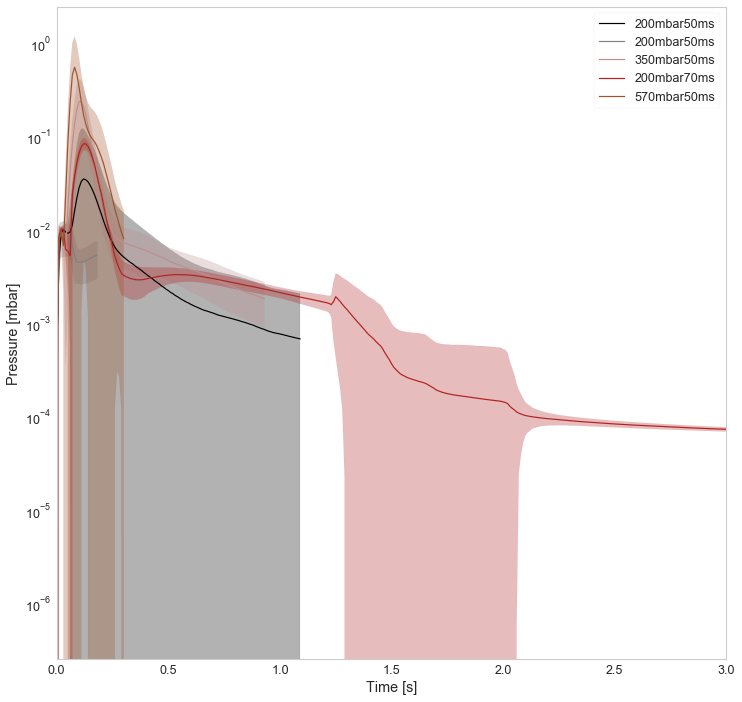

In [74]:
for i, f in enumerate(files):
    dfp, p_gas, t_on, date = import_peaks(f)
    plotAverageProfile(dfp, color=some_cols[i], lb=p_gas+t_on)
plt.xlim(0,3)

In [42]:
path = '../ali_data/calibration/processed_peaks/30052019_methanol_100ul_1000mbar_50ms_200pulses.pyk'
df = pd.read_csv(path, index_col=0)
Npeaks = len(df.columns)
filename = os.path.split(path)[1]
import re
p_gas = re.search('\d+mbar', filename).group(0)
t_on = re.search('\d+ms', filename).group(0)
date = re.search('/\d+_', path).group(0).replace('/', '').replace('_', '')

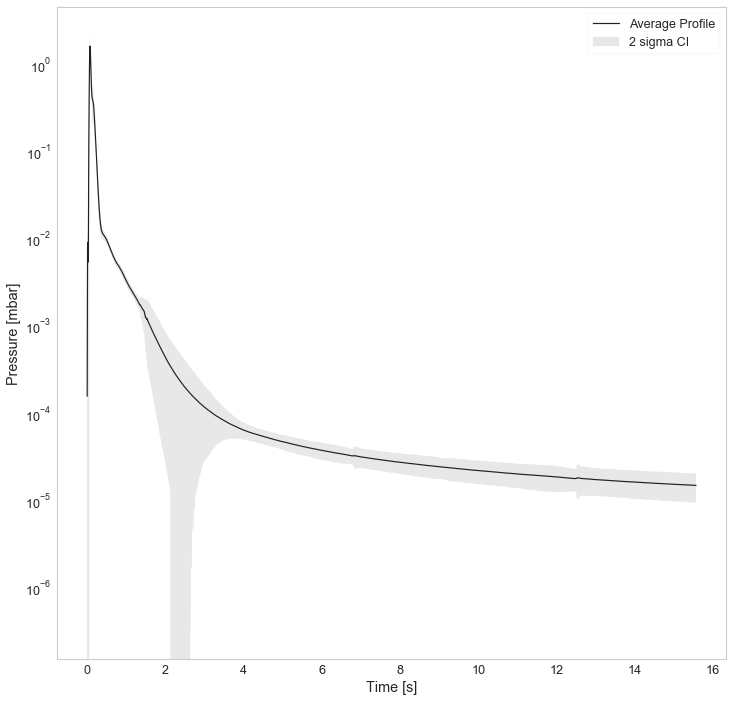

In [5]:
plotAverageProfile(df)
# findRecoveryPoints(df.iloc[:,0])

Text(0.5, 1.0, '30052019_methanol_100ul_1000mbar_50ms_200pulses.pyk')

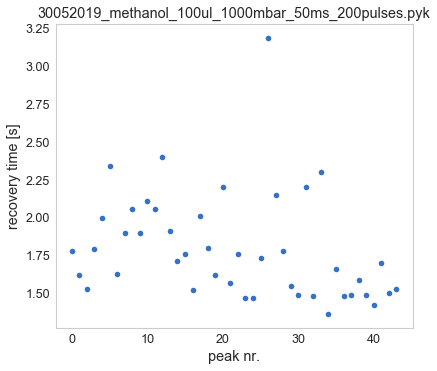

In [86]:
def plotRecoveryTimes(dfp : pd.DataFrame, pAct : float) -> list:
    """Compute and plot recovery times from a dfpPeak and specified pAct
    Return recovery time
    Input:
    dfp : pd.DataFrame
        ALI peaks df (from .pyk file)
    pAct : float
        pressure threshold for recovery time 
    """
    rT = []
    Npeaks = len(dfp.columns)
    for i in range(Npeaks):
        rPt = findRecoveryPoints(dfp['peak'+str(i)], pAct)
        if len(rPt) > 0:
            rT.append(rPt[0]/100)
    plt.plot(rT, 'o')
    plt.xlabel('peak nr.')
    plt.ylabel('recovery time [s]')
    return rT
plotRecoveryTimes(df, 5e-4)
plt.title(filename)

Text(0.5, 1.0, '30052019_methanol_100ul_1000mbar_50ms_200pulses.pyk')

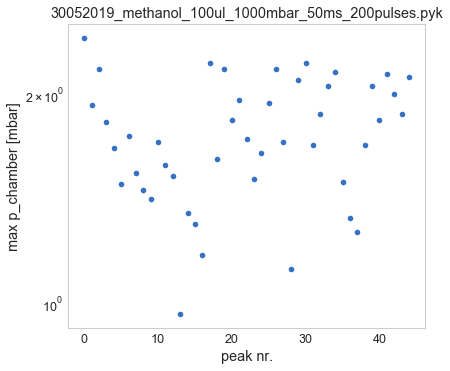

In [7]:
def plot_maxP(dfp : pd.DataFrame) -> list:
    """Compute and plot max reached pressures in a dfpPeak
    Return list of maxP
    Input:
    dfpp : pd.DataFrame
        ALI peaks dfp (from .pyk file)
    Output:
    maxP : list
        List of max. pressures reached per peak"""
    maxP = dfp.max(axis=0).values
    plt.semilogy(maxP, 'o')
    
    plt.xlabel('peak nr.')
    plt.ylabel('max p_chamber [mbar]')
    return maxP
plot_maxP(dfp)
plt.title(filename)

In [105]:
rT = []
Npeaks = len(df.columns)
for i in range(Npeaks):
    rPt = findRecoveryPoints(df['peak'+str(i)], pAct = 1e-4)
    if len(rPt) > 0:
        rT.append(rPt[0]/100)

In [65]:
df

,peak0,peak1,peak2,peak3,peak4,peak5,peak6,peak7,peak8,peak9,...,peak35,peak36,peak37,peak38,peak39,peak40,peak41,peak42,peak43,peak44
0,0.000742,0.000010,0.000267,0.000088,0.000243,0.000075,0.000214,0.000077,0.000033,0.000038,...,0.000069,0.000012,0.000520,0.000061,0.000022,0.000010,0.000026,0.000151,0.000010,0.000081
1,0.010143,0.003652,0.009955,0.009770,0.010049,0.010143,0.009955,0.008649,0.007657,0.007038,...,0.009955,0.003085,0.009862,0.009411,0.007515,0.001860,0.008100,0.010143,0.001070,0.009862
2,0.000012,0.010239,0.010239,0.010239,0.008177,0.010239,0.010049,0.010239,0.010143,0.010143,...,0.009499,0.010143,0.005946,0.010143,0.010239,0.010143,0.007445,0.010432,0.010143,0.009955
3,0.077505,0.000011,0.000051,0.000071,0.000017,0.000011,0.000041,0.003085,0.010143,0.010239,...,0.000027,0.009236,0.000010,0.000239,0.000010,0.000012,0.000010,0.034620,0.000017,0.000035
4,0.430632,0.048967,0.091746,0.041756,0.051316,0.033977,0.040981,0.001528,0.000348,0.000019,...,0.039105,0.000010,0.102665,0.024939,0.127359,0.052780,0.097966,0.122673,0.049428,0.072584
5,1.789451,0.388453,0.403290,0.187022,0.170292,0.227698,0.156518,0.134725,0.067341,0.085119,...,0.132223,0.119273,0.319060,0.127359,0.675240,0.325096,0.714294,0.586693,0.171895,0.304455
6,2.415206,1.230061,1.389423,0.592216,0.937350,0.727808,0.662702,0.384830,0.243135,0.259619,...,0.559837,0.455539,0.734660,0.377684,1.554792,1.230061,1.691612,1.756225,1.010323,1.241643
7,2.059525,1.928761,2.178643,1.823305,1.675834,1.325822,1.660203,1.141217,0.626469,0.964076,...,1.313456,0.928607,1.265133,1.350906,2.059525,1.840472,2.138190,2.002431,1.875292,2.118247
8,1.230061,1.739844,1.739844,1.789451,1.660203,1.483622,1.739844,1.540290,1.456074,1.415709,...,1.497590,1.325822,1.207222,1.691612,1.554792,1.723616,1.554792,1.599123,1.840472,1.772760
9,0.894443,1.130572,1.241643,1.350906,1.162807,1.010323,1.350906,1.277045,1.350906,1.289068,...,1.253333,1.130572,0.886100,1.402505,0.964076,0.982315,0.982315,1.029438,1.265133,1.265133


In [107]:
cols = df.columns
recP = pd.DataFrame()
probPeak = []
rP = []
def test(peak : np.array):
    a = np.where(peak < 3e-4)[0]
    b = filterRepeatedOccurrences(a)
    if len(b) == 0:
        print(a, peak)
        probPeak.append(peak)
    else:
        return (b/100)
        
rP = df.apply(test)
rP
# plt.plot(rP, 'o')

,peak0,peak1,peak2,peak3,peak4,peak5,peak6,peak7,peak8,peak9,...,peak35,peak36,peak37,peak38,peak39,peak40,peak41,peak42,peak43,peak44
0,2.07,1.83,1.81,2.03,2.24,2.55,1.87,2.11,2.29,2.21,...,1.55,1.81,1.8,1.54,1.83,1.66,1.51,1.87,1.67,1.73


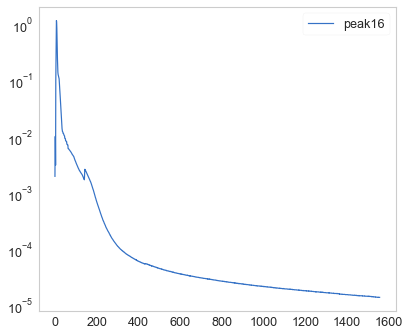

In [84]:
df[probPeak].plot()
plt.yscale('log')

In [91]:
df.drop(probPeak, axis=1, inplace=True)

In [90]:
def depletionFromMaxP(dfp) -> int:
    """Find liquid exhaustion moment by fitting a constant to the maxP
    scatter and choosing the maximum value of chi2. Plot fit and Chi2"""
    
    maxP = plot_maxP(df)
    x = np.arange(len(maxP))
    UmaxP = 0.3 * np.array(maxP)
    from scipy.optimize import curve_fit
    def func (x, a): return a

    fit, cov = curve_fit(func,x, maxP)#, sigma=UmaxP, absolute_sigma=True)
    sd = np.std(maxP)
    # sd = cov[0]
    chi2 = (maxP - fit[0])**2/UmaxP**2

    plt.axhline(y=fit[0], color='r')
    plt.plot(x, chi2, '.')
    # plt.fill_between(x, fit[0]-cov[0], fit[0]+cov[0], color='g', alpha=0.5)
    plt.fill_between(x, fit[0]-sd, fit[0]+sd, color='r', alpha=0.3)
    plt.title('Max pressure per pulse')
    return np.argmax(chi2)

# Depletion 2: 350 mbar, 50 ms 

In [8]:
path = '../ali_data/depletion_cleaning/processed_peaks/10102019_depletion_AcN_FBI_500nM_350mbar_50ms_300pulse.pyk'
df = pd.read_csv(path, index_col=0)
Npeaks = len(df.columns)
filename = os.path.split(path)[1]

p_gas = re.search('\d+mbar', filename).group(0)
t_on = re.search('\d+ms', filename).group(0)

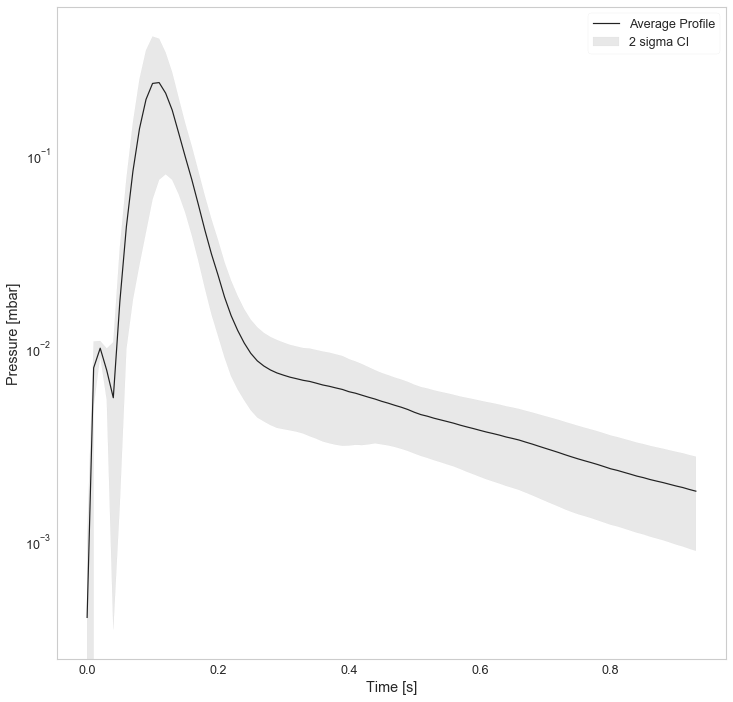

In [8]:
plotAverageProfile(df)


Text(0.5, 1.0, 'Recovery time per pulse')

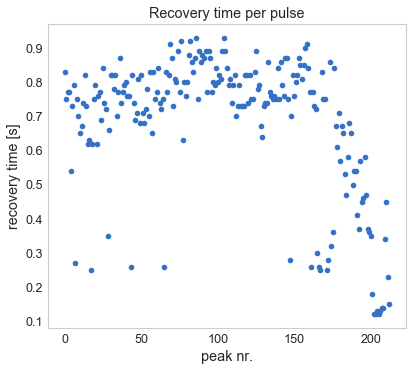

In [27]:
rT = plotRecoveryTimes(df, 3e-3)
plt.title('Recovery time per pulse')

Text(0.5, 1.0, 'Max pressure per pulse')

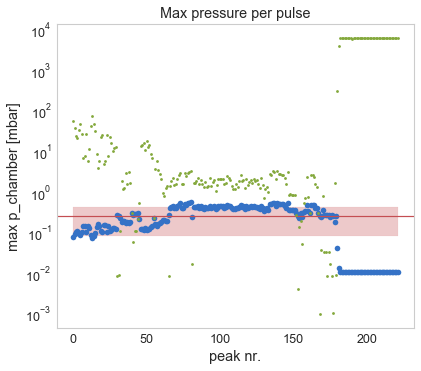

In [28]:
maxP = plot_maxP(df)
x = np.arange(len(maxP))
UmaxP = 0.3 * np.array(maxP)
from scipy.optimize import curve_fit
def func (x, a): return a

fit, cov = curve_fit(func,x, maxP)#, sigma=UmaxP, absolute_sigma=True)
sd = np.std(maxP)
# sd = cov[0]
chi2 = (maxP - fit[0])**2/UmaxP**2

plt.axhline(y=fit[0], color='r')
plt.plot(x, chi2, '.')
# plt.fill_between(x, fit[0]-cov[0], fit[0]+cov[0], color='g', alpha=0.5)
plt.fill_between(x, fit[0]-sd, fit[0]+sd, color='r', alpha=0.3)
plt.title('Max pressure per pulse')

Text(0.5, 1.0, 'Histogram recovery time')

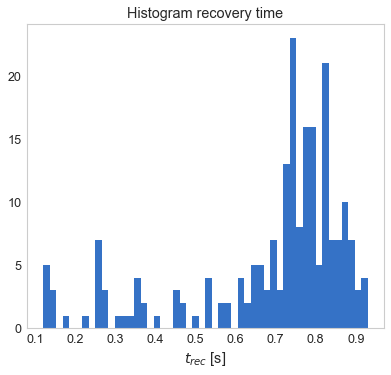

In [29]:
n, bins, _ = plt.hist(rT, bins=50)
# plt.xscale('log')
plt.xlabel('$t_{rec}$ [s]')
plt.title('Histogram recovery time')

Text(0.5, 1.0, 'Histogram max Press')

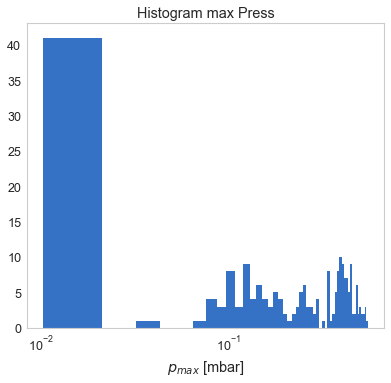

In [31]:
n, bins, _ = plt.hist(maxP, bins=50)
plt.xscale('log')
plt.xlabel('$p_{max}$ [mbar]')
plt.title('Histogram max Press')

## Examine profiles before and after depletion

In [171]:
np.average(maxP) , np.std(maxP)

(0.04808593558862876, 0.09599763223915364)

In [123]:
deplet = np.where(np.array(maxP) < 5e-2)[0]
deplet

array([180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192,
       193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205,
       206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218,
       219, 220, 221])

In [10]:
inDeplet = np.argmax(chi2)

Text(0.5, 1.0, 'After depletion: last 40 peaks')

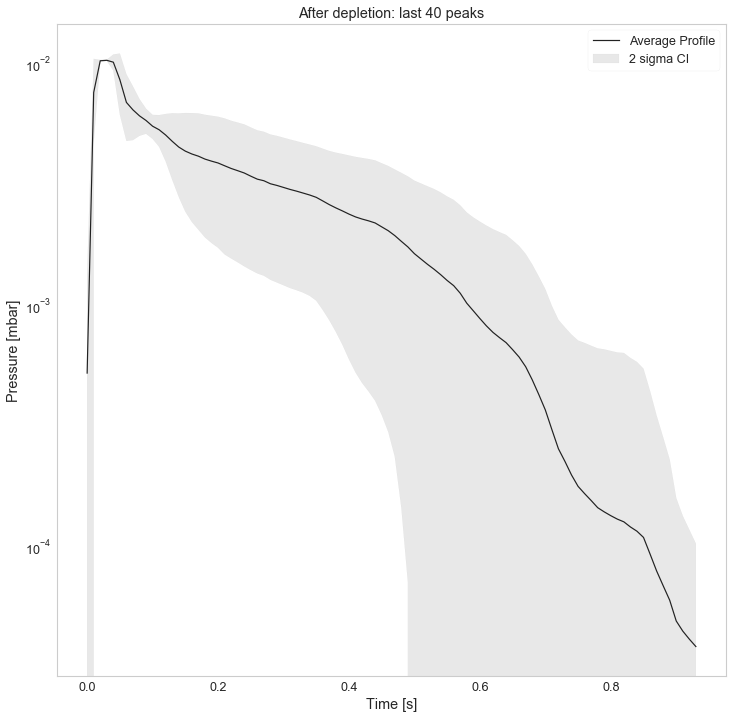

In [11]:
plotAverageProfile(df.iloc[:,inDeplet:])
plt.title('After depletion: last 40 peaks')

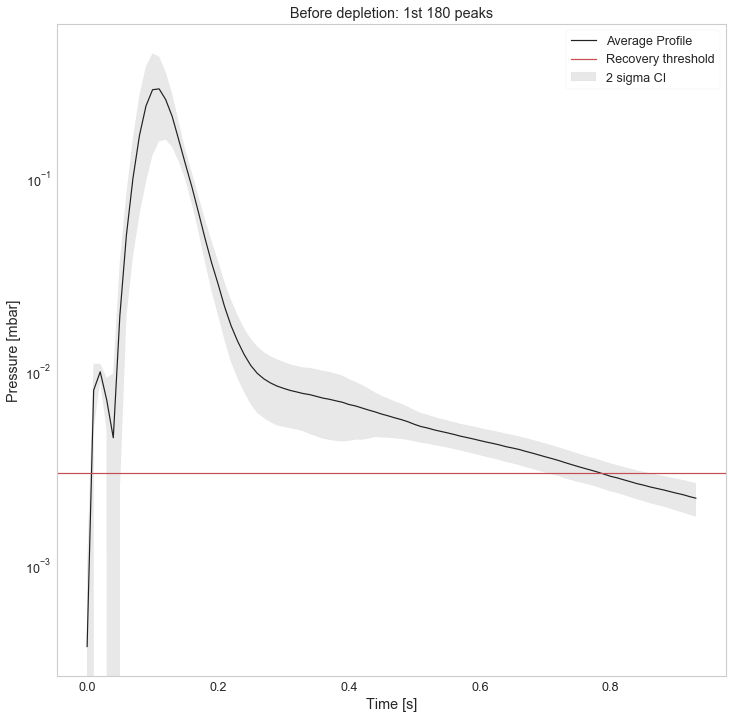

In [12]:
plotAverageProfile(df.iloc[:,:inDeplet])
plt.title('Before depletion: 1st 180 peaks')
plt.axhline(y=3e-3, color='r', label='Recovery threshold')
plt.legend()

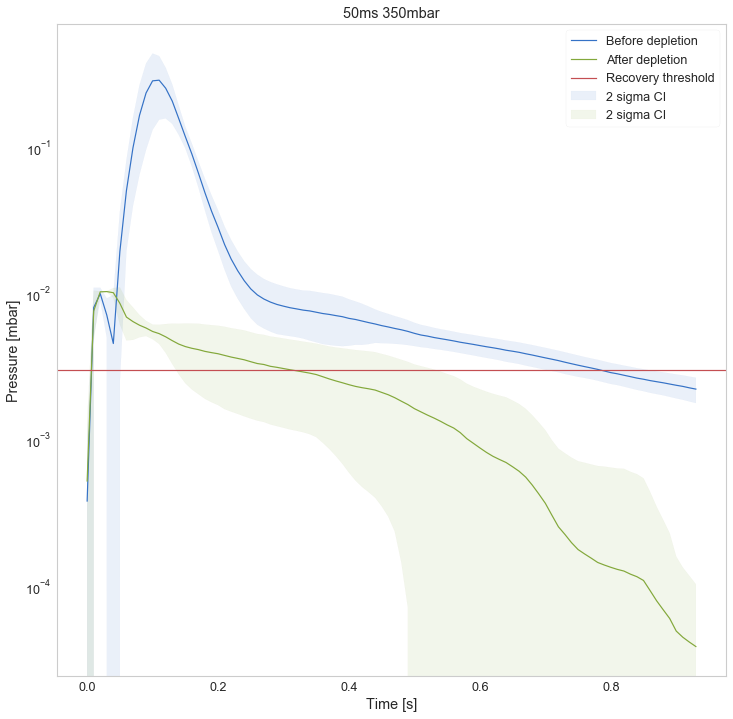

In [17]:
plotAverageProfile(df.iloc[:,:inDeplet], color='b', lb='Before depletion')
plotAverageProfile(df.iloc[:,inDeplet:], color='g', lb='After depletion')

plt.title(t_on+' '+p_gas)
plt.axhline(y=3e-3, color='r', label='Recovery threshold')
plt.legend()

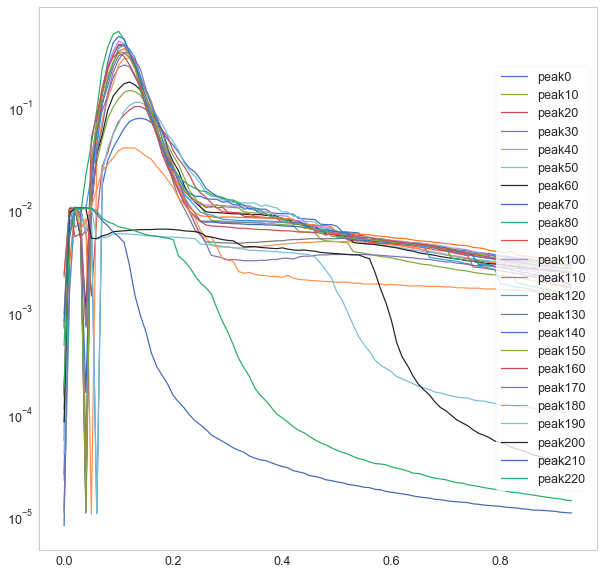

In [140]:
x = df.index.values/100
plt.figure(figsize=(10,10))
for i in range(0,Npeaks,10):
    plt.semilogy(x, df['peak'+str(i)], label='peak'+str(i))
    plt.legend(loc='right')
    

## Average representative statistics: recovery time and maxP

In [127]:
np.average(maxP[:180]), np.std(maxP[:180])

(0.3087498905722223, 0.13776986431202698)

In [128]:
np.average(rT[:180]), np.std(rT[:180])

(0.741888888888889, 0.15105109102143363)

# Other file 

In [32]:
path = '../ali_data/depletion_cleaning/processed_peaks/21102019_depletion_AcN_FBI_1uM_200mbar_50ms_300pulse.pyk'
df = pd.read_csv(path, index_col=0)
Npeaks = len(df.columns)
filename = os.path.split(path)[1]

In [23]:
rawpath = '../ali_data/depletion_cleaning/21102019_depletion_AcN_FBI_1uM_200mbar_50ms_300pulse'
dfRaw = load_raw_ali_df(rawpath)
dfRaw

,datetime,p_chamber,p_act,p_lock,p_pre-inj,t_valve,valve,time_on
0,2019-10-21 08:25:03.450,6.400000e-08,0.00001,0.001,260.0,24.2,0,50
1,2019-10-21 08:25:03.460,6.300000e-08,0.00001,0.001,260.0,24.2,0,50
2,2019-10-21 08:25:03.470,6.300000e-08,0.00001,0.001,260.0,24.2,0,50
3,2019-10-21 08:25:03.480,6.300000e-08,0.00001,0.001,260.0,24.2,0,50
4,2019-10-21 08:25:03.490,6.300000e-08,0.00001,0.001,260.0,24.1,0,50
5,2019-10-21 08:25:03.500,6.400000e-08,0.00001,0.001,260.0,24.1,0,50
6,2019-10-21 08:25:03.510,6.400000e-08,0.00001,0.001,260.0,24.2,0,50
7,2019-10-21 08:25:03.520,6.300000e-08,0.00001,0.001,260.0,24.2,0,50
8,2019-10-21 08:25:03.530,6.400000e-08,0.00001,0.001,260.0,24.1,0,50
9,2019-10-21 08:25:03.540,6.400000e-08,0.00001,0.001,260.0,24.2,0,50


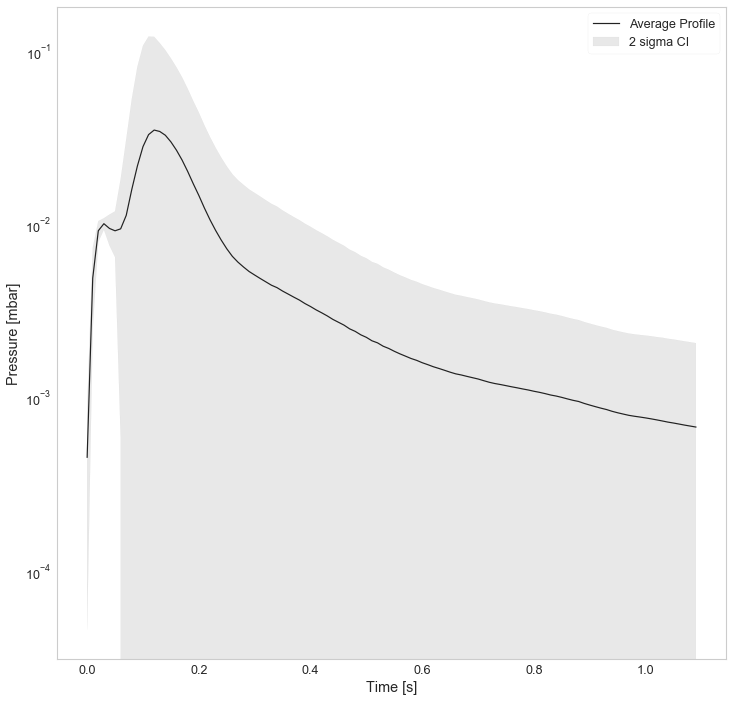

In [19]:
plotAverageProfile(df)


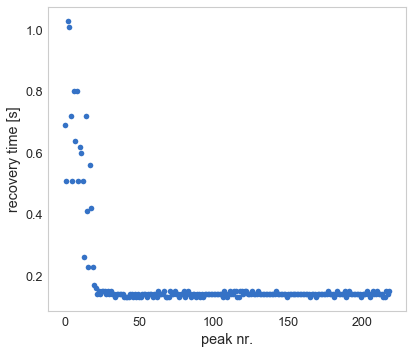

In [33]:
rT = plotRecoveryTimes(df, 1e-3)

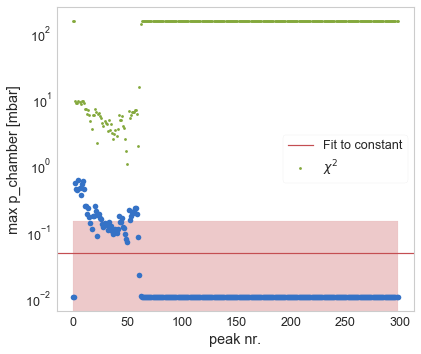

In [41]:
maxP = plot_maxP(df)
x = np.arange(len(maxP))
UmaxP = 0.3 * np.array(maxP)
from scipy.optimize import curve_fit
def func (x, a): return a

fit, cov = curve_fit(func,x, maxP)#, sigma=UmaxP, absolute_sigma=True)
sd = np.std(maxP)
# sd = cov[0]
chi2 = (maxP - fit[0])**2/UmaxP**2

plt.axhline(y=fit[0], color='r', label='Fit to constant')
plt.plot(x, chi2, '.', label='$\\chi^2$')

# plt.fill_between(x, fit[0]-cov[0], fit[0]+cov[0], color='g', alpha=0.5)
plt.fill_between(x, fit[0]-sd, fit[0]+sd, color='r', alpha=0.3)
plt.legend()

In [43]:
bins, n

(array([0.01023874, 0.02210238, 0.03396602, 0.04582965, 0.05769329,
        0.06955693, 0.08142056, 0.0932842 , 0.10514784, 0.11701147,
        0.12887511, 0.14073875, 0.15260238, 0.16446602, 0.17632966,
        0.18819329, 0.20005693, 0.21192057, 0.2237842 , 0.23564784,
        0.24751148, 0.25937511, 0.27123875, 0.28310239, 0.29496602,
        0.30682966, 0.3186933 , 0.33055693, 0.34242057, 0.35428421,
        0.36614784, 0.37801148, 0.38987512, 0.40173875, 0.41360239,
        0.42546603, 0.43732966, 0.4491933 , 0.46105694, 0.47292057,
        0.48478421, 0.49664785, 0.50851149, 0.52037512, 0.53223876,
        0.5441024 , 0.55596603, 0.56782967, 0.57969331, 0.59155694,
        0.60342058]),
 array([240.,   0.,   0.,   0.,   1.,   1.,   4.,   3.,   6.,   5.,   4.,
          3.,   3.,   5.,   4.,   2.,   2.,   1.,   3.,   3.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   2.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,
  

Text(0.5, 1.0, 'Histogram recovery time')

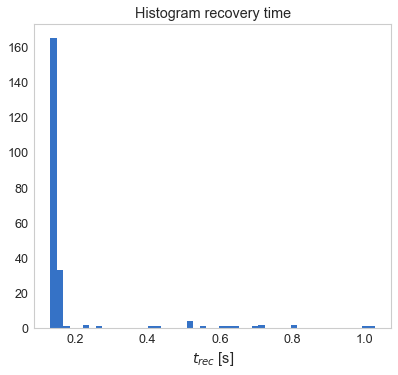

In [44]:
plt.hist(rT, bins=50);
# plt.xscale('log')
plt.xlabel('$t_{rec}$ [s]')
plt.title('Histogram recovery time')

Text(0.5, 1.0, 'Histogram max Press')

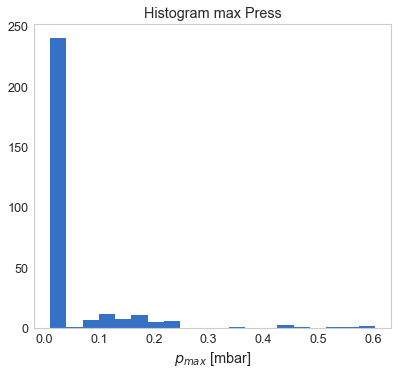

In [53]:
n, bins, _ = plt.hist(maxP, bins=20)
# plt.xscale('log')
plt.xlabel('$p_{max}$ [mbar]')
plt.title('Histogram max Press')

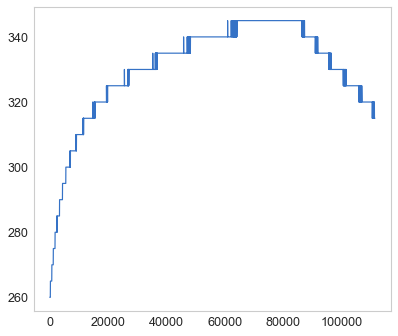

In [24]:
dfRaw['p_pre-inj'].plot()

In [46]:
iDeplet = np.argmax(chi2)

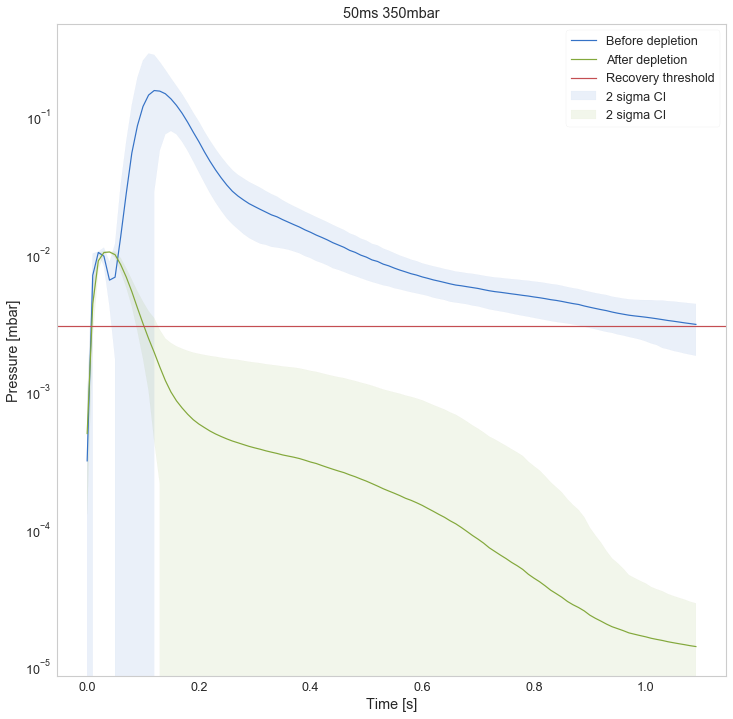

In [47]:
plotAverageProfile(df.iloc[:,:iDeplet], color='b', lb='Before depletion')
plotAverageProfile(df.iloc[:,iDeplet:], color='g', lb='After depletion')

plt.title(t_on+' '+p_gas)
plt.axhline(y=3e-3, color='r', label='Recovery threshold')
plt.legend()

## Fit only low maxP

# Other

In [17]:
df = load_raw_ali_df('../ali_data/depletion_cleaning/DCM/15012020_depletion_CH2Cl2_200mbar_10ms_200pulses_300uL')

No handles with labels found to put in legend.


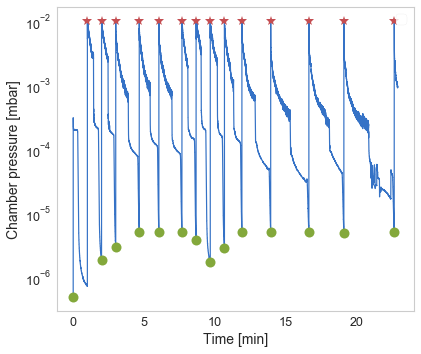

In [30]:
pe, tr = plot_pressure_curve(df, tit='', min_sp=5000);

In [33]:
len(pe)

14

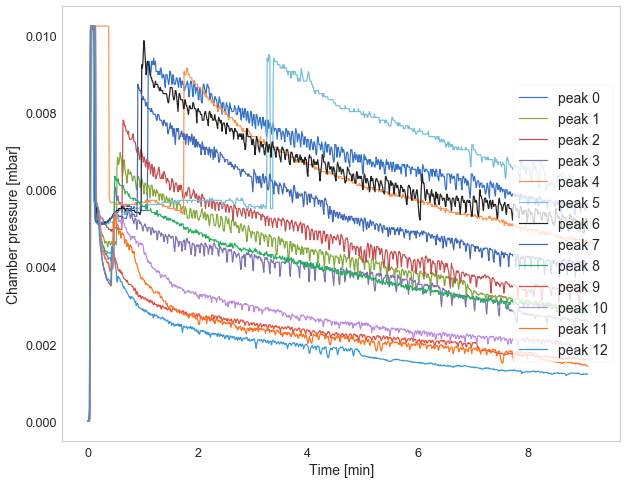

In [39]:
overlay_peaks(df, pe[1:], tr[1:], 13, scale='min')
plt.yscale('linear')

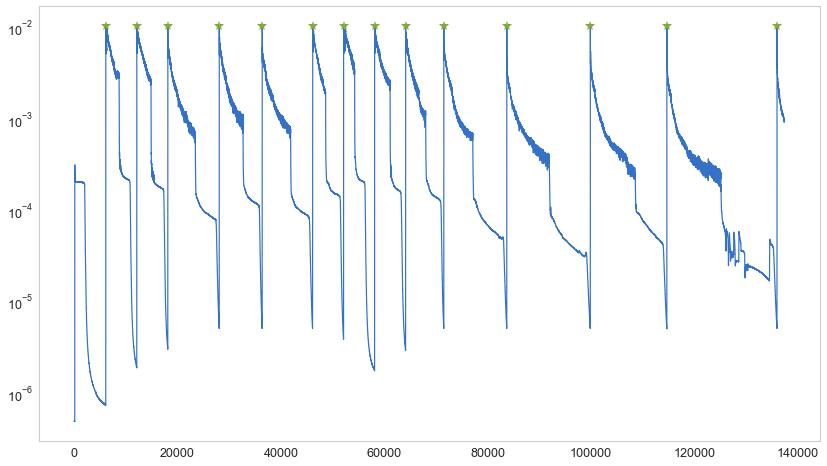

In [28]:
plt.figure(figsize=(14,8))
plt.plot(df.p_chamber)
import peakutils
peaks = peakutils.indexes(df.p_chamber, min_dist=5000)
plt.yscale('log')
plt.plot(peaks, df.p_chamber[peaks], '*', markersize=10, label='__nolegend__')


In [ ]:
overlay_peaks(df, )

In [6]:
df = load_raw_ali_df('../ali_data/calibration/30052019_methanol_100ul_1000mbar_50ms_200pulses')

In [7]:
path = '../ali_data/calibration/30052019_methanol_100ul_1000mbar_50ms_200pulses'
dfp = process_dfRaw_peaks(path)